In [311]:
#l = [i for i in range(len(ij)) if ij.loc[i]['Notes'].find("poison")!=-1]
#ij.loc[l]

In [302]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [254]:
ls

2012-18_officialBoxScore.csv*  2017-18_standings.csv*
2012-18_playerBoxScore.csv*    2017-18_teamBoxScore.csv*
2012-18_standings.csv*         analysis.ipynb
2012-18_teamBoxScore.csv*      injuries.csv*
2016-17_officialBoxScore.csv*  metadata_officialBoxScore.pdf*
2016-17_playerBoxScore.csv*    metadata_playerBoxScore.pdf*
2016-17_standings.csv*         metadata_standing.pdf*
2016-17_teamBoxScore.csv*      metadata_teamBoxScore.pdf*
2017-18_officialBoxScore.csv*  teamBoxScore.csv*
2017-18_playerBoxScore.csv*


In [78]:
players = pd.read_csv("2012-18_playerBoxScore.csv")
players['gmDate']= players['gmDate'].apply(lambda x:pd.to_datetime(x))
players.head(2)

In [255]:
ij = pd.read_csv("injuries.csv")
ij['Date'] = ij['Date'].apply(lambda x:pd.to_datetime(x))
ij = ij[ij['Date']>pd.to_datetime("2012-10-29")]
ij.head(2)


,Date,Team,Acquired,Relinquised,Notes
2218,2012-10-30,Bulls,NaN,Derrick Rose,recovering from surgery on left knee to repair...
2219,2012-10-30,Celtics,NaN,Darko Milicic,back spasms (DTD)


In [282]:
# If you look at the 'Notes' column above, there are lots of similar kinds
# of injuries that I wanted to group together. This manually combines a
# lot of them into more easily analyzable categories.
l = []
for i in ij['Notes']:
    if i.find('ankle')!=-1:
        l.append('ankle')
    elif i.find("torn")!=-1:
        l.append(i)
    elif i.find("knee")!=-1:
        l.append("knee")
    elif i.find("head")!=-1:
        l.append("head")
    elif i.find("knee")!=-1:
        l.append("knee")
    elif i.find("calf")!=-1:
        l.append("calf")
    elif i.find("elbow")!=-1:
        l.append("elbow")
    elif i.find("wrist")!=-1:
        l.append("wrist")
    elif i.find("hand")!=-1:
        l.append("hand")
    elif i.find("foot")!=-1:
        l.append("foot")
    elif i.find("back")!=-1:
        l.append("back")
    elif i.find("concussion")!=-1:
        l.append("concussion")
    elif i.find("hamstring")!=-1:
        l.append("hamstring")
    elif i.find("illness")!=-1:
        l.append("illness")
    elif i.find("rest")!=-1:
        l.append("rest")
    
    elif i==i:
        l.append(i)
    else:
        l.append("nan")
ij['Notes'] = l

In [288]:
biggest = []
for typeof in ij['Notes'].value_counts()[1:13].index: # For each type of injury
    df_injury = ij[ij['Notes']==typeof] #               Then filter the df
    bigger = []#                                        Create list which we will build up
    for player in df_injury['Relinquised'].unique():  # For each player in injuries df
        player_injuries = [t for t in df_injury[df_injury['Relinquised']==player]['Date']] # Grab all the dates of said players injuries
        if len(player_injuries)==0:
            print("Player does not have any recorded injuries:",player)
            pass
        try:
            ln = player.split()[1] # Players df holds names in two different categories
            fn = player.split()[0]
            for i in range(len(player_injuries)): # For each injury that player had
                date = player_injuries[i]    #      Find date of injury
                try:                         #      We need to set a date of previous injury, if there is one
                    dateM1 = player_injuries[i-1] # If we can find it, we set it
                except:
                    dateM1 = pd.to_datetime("1990-01-01")# If we can't, we set previous date until way in the past
                try:
                    dateP1 = player_injuries[i+1] # Same for next injury
                except:
                    dateP1 = pd.to_datetime("2090-01-01")

                b = players[players['playLNm']==ln] # Find that players games
                b = b[b['playFNm']==fn].reset_index()

                if len(b>0):
                    pass
                else:
                    print("No matches found for player name",fn,ln)
                    
                if len(b[b['gmDate']==date])>0: # This is testing if the injury happened during a game
                    g = 1
                    game_injury_index = b[b['gmDate']==date].index[0]

                else:
                    #Injury did not happen during a game if it got here, so pass (aka discard)
                    pass

                #print("here")
                for daterange in range(game_injury_index-7,game_injury_index):
                    try:
                        if row.gmDate >dateM1: # Making sure that the game wasn't prior to a different injury
                            row = b.loc[daterange] # Grab a specific row
                            pre = [daterange-game_injury_index,row.gmDate,row.playPTS,row.playMin,row.playAST] # Build a list of useful info
                            bigger.append(pre)# Add list to bigger list
                    except:# If we get to this point, it means it couldnt find a previous game of that number
                        pass # E.g. It couldnt find the 7th previous game to the injury

                    try:
                        if row.gmDate<dateP1: # Same as above, but with games AFTER injury
                            row = b.loc[daterange+7+g]
                            post = [daterange-game_injury_index+8,row.gmDate,row.playPTS,row.playMin,row.playAST]
                            bigger.append(post)
                    except: # Same as above except statement
                        pass
        except:
            print(player) # This means something weird happened, so print the players name
    biggest.append({typeof:bigger})

No matches found for player name Amare Stoudemire
No matches found for player name Amare Stoudemire
No matches found for player name Amare Stoudemire
No matches found for player name Amare Stoudemire
No matches found for player name Amare Stoudemire
No matches found for player name Amare Stoudemire
No matches found for player name Amare Stoudemire
No matches found for player name Luke Harangody
No matches found for player name P.J. Tucker
No matches found for player name Festus Ezeli
No matches found for player name Festus Ezeli
No matches found for player name Festus Ezeli
No matches found for player name Festus Ezeli
No matches found for player name Festus Ezeli
No matches found for player name Festus Ezeli
No matches found for player name Ben Gordon
No matches found for player name Ben Gordon
No matches found for player name Ben Gordon
No matches found for player name Ben Gordon
No matches found for player name Ben Gordon
No matches found for player name C.J. Watson
No matches found

No matches found for player name Reggie Bullock
No matches found for player name Reggie Bullock
No matches found for player name Reggie Bullock
No matches found for player name Reggie Bullock
No matches found for player name Reggie Bullock
No matches found for player name Amare Stoudemire
No matches found for player name Amare Stoudemire
No matches found for player name Amare Stoudemire
No matches found for player name Amare Stoudemire
No matches found for player name Amare Stoudemire
No matches found for player name Hollis Thompson
No matches found for player name Hollis Thompson
No matches found for player name Hollis Thompson
No matches found for player name Victor Oladipo
No matches found for player name Josh McRoberts
No matches found for player name Josh McRoberts
No matches found for player name Josh McRoberts
No matches found for player name P.J. Hairston
No matches found for player name Jerami Grant
No matches found for player name Dennis Schroder
No matches found for player n

No matches found for player name Jonas Valanciunas
No matches found for player name Jose Juan
No matches found for player name Jose Juan
No matches found for player name Jose Juan
No matches found for player name Vince Carter
No matches found for player name Nene /
No matches found for player name Nene /
No matches found for player name Will Barton
No matches found for player name C.J. McCollum
No matches found for player name Dennis Schroder
No matches found for player name Dennis Schroder
No matches found for player name Tim Hardaway
No matches found for player name Jose Juan
No matches found for player name Jose Juan
No matches found for player name Jose Juan
No matches found for player name Jose Juan
No matches found for player name Jose Juan
No matches found for player name Jose Juan
No matches found for player name Jose Juan
No matches found for player name Nene /
No matches found for player name Nene /
No matches found for player name Nene /
No matches found for player name Nene

No matches found for player name Henry Walker
No matches found for player name Jose Juan
No matches found for player name Goran Dragic
No matches found for player name Goran Dragic
No matches found for player name Ben Simmons
No matches found for player name Dennis Schroder
No matches found for player name Doug McDermott
No matches found for player name Fab Melo
No matches found for player name Nikola Vucevic
No matches found for player name Nikola Vucevic
No matches found for player name Nikola Vucevic
No matches found for player name Nikola Vucevic
No matches found for player name Nikola Vucevic
No matches found for player name Nikola Vucevic
No matches found for player name Nikola Vucevic
No matches found for player name Nikola Vucevic
No matches found for player name Nikola Vucevic
No matches found for player name Nikola Vucevic
No matches found for player name Nikola Vucevic
No matches found for player name Nikola Vucevic
No matches found for player name Nikola Vucevic
No matches 

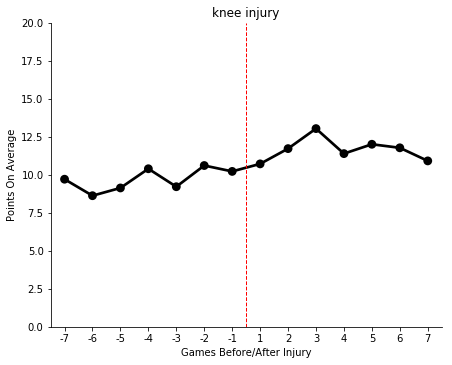

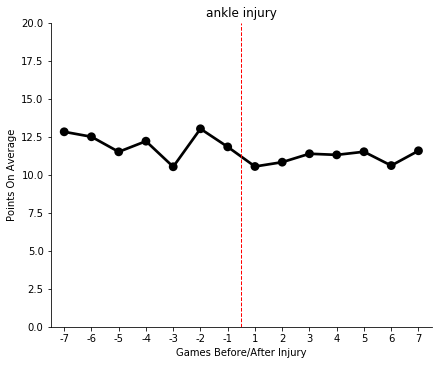

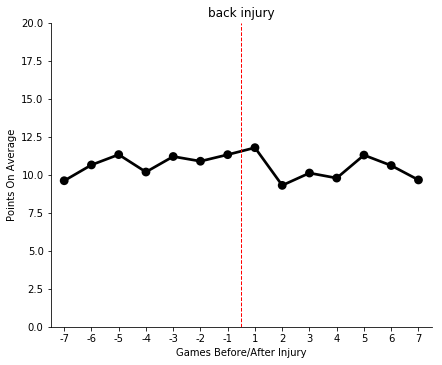

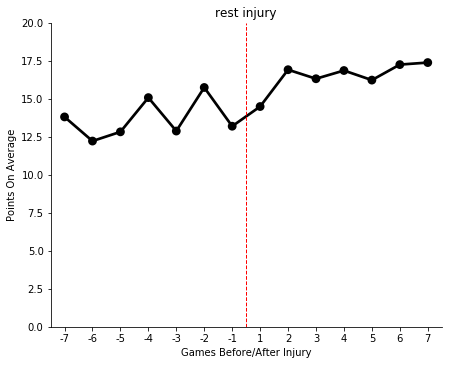

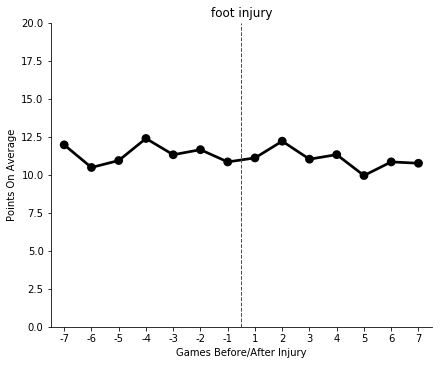

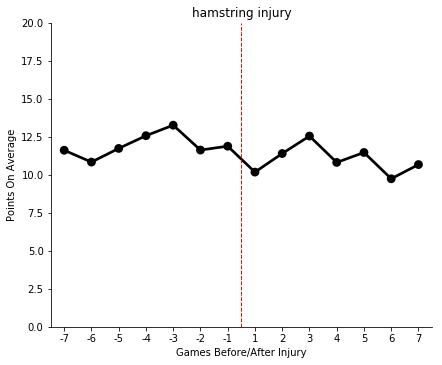

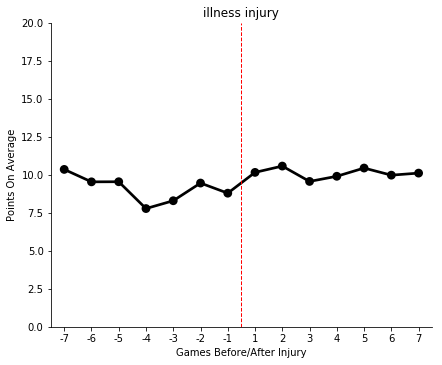

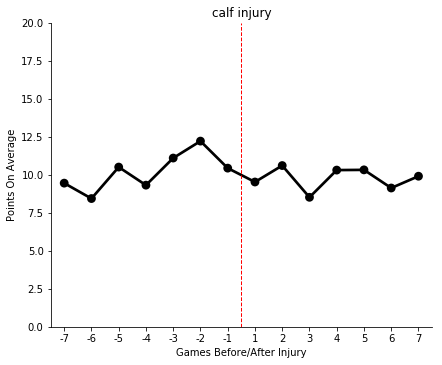

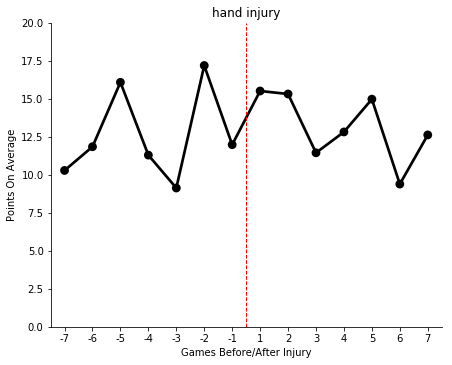

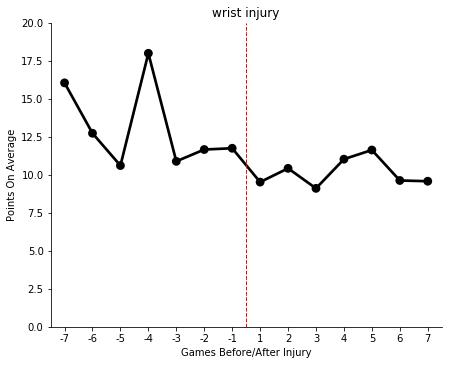

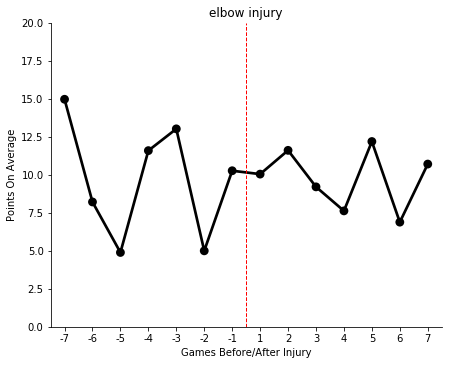

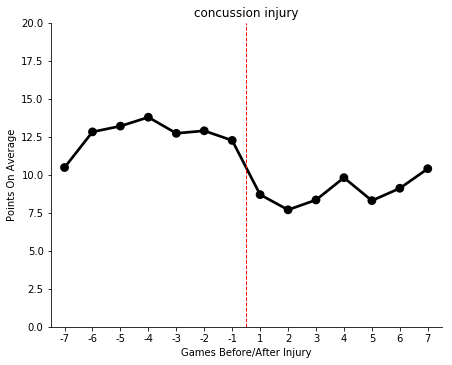

In [310]:
df_l = []
for i in biggest:
    for key,item in i.items():
        df = pd.DataFrame(item)
        df.columns = ['day','date','pts','min','ast']
        df_l.append([key,df])
for i in df_l:
    i[1]=i[1].groupby('day').agg({'pts':np.mean}).reset_index()
    a=sb.factorplot(x='day',y='pts',data=i[1],sharey=False,color='black',aspect=1.25)
    a.axes[0,0].set_title(i[0]+" injury")
    plt.ylim(0,20)
    a.axes[0,0].axvline(6.5,lw=1,c='r',ls='--',zorder=100)
    #plt.plot([0, 4], [1.5, 0], linewidth=2)
    plt.xlabel("Games Before/After Injury")
    plt.ylabel("Points On Average")
plt.show()

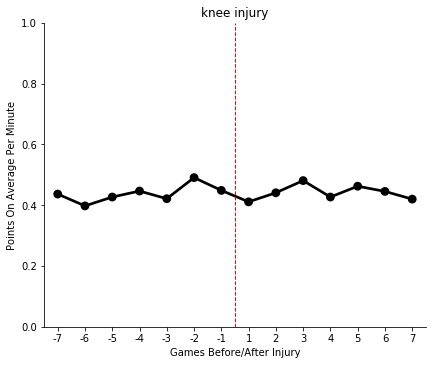

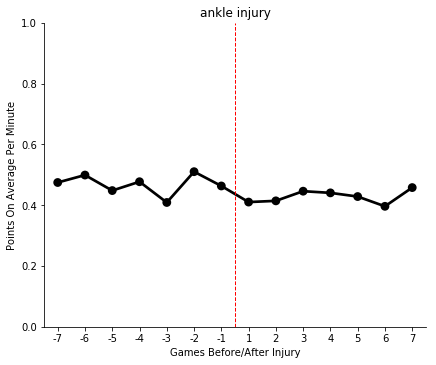

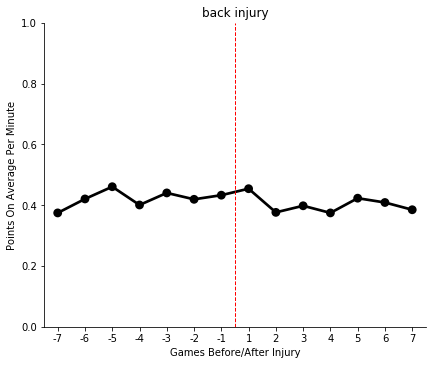

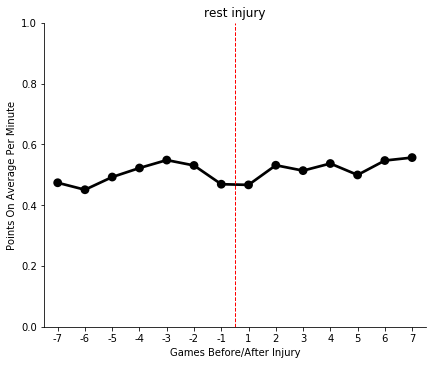

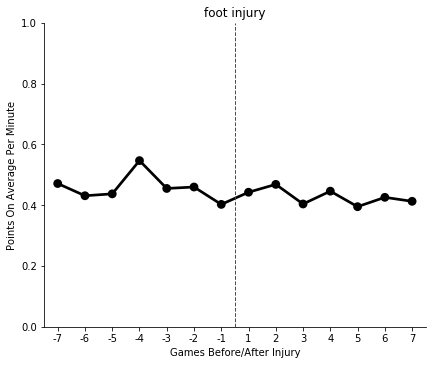

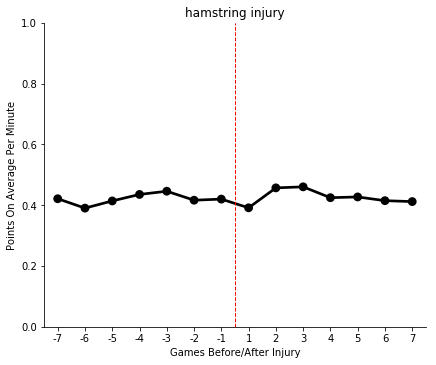

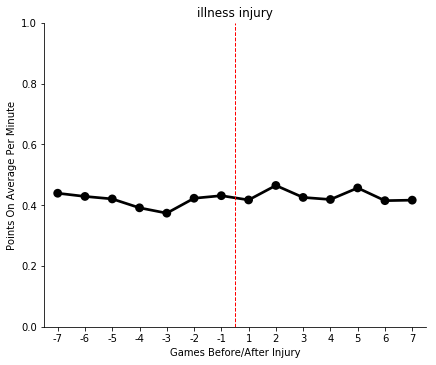

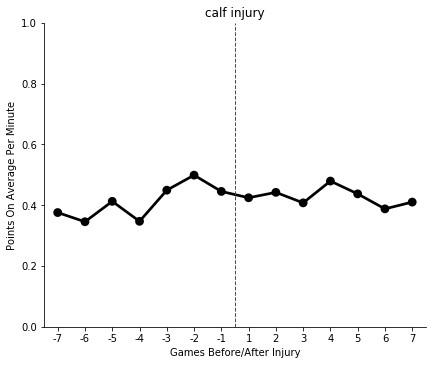

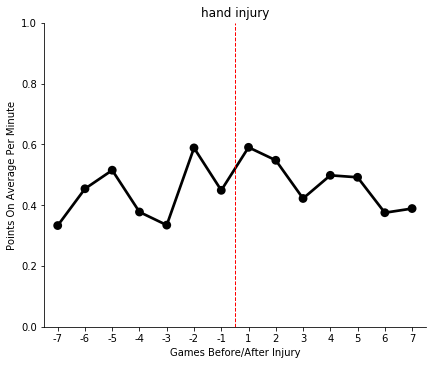

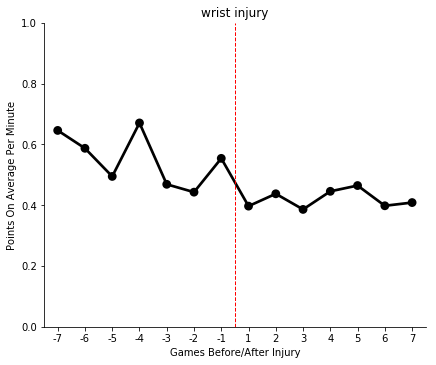

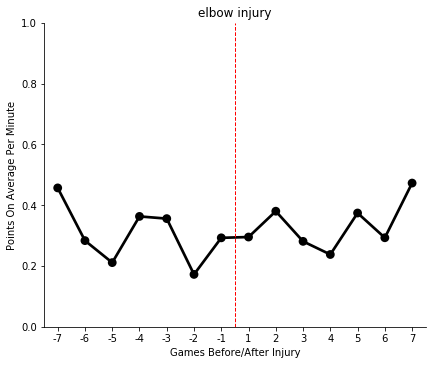

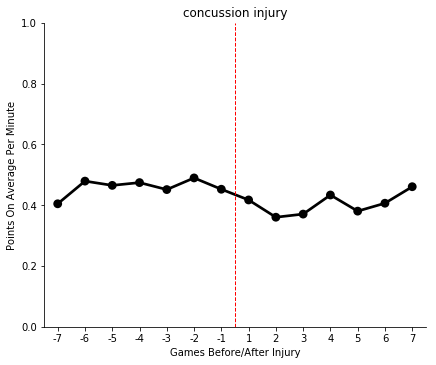

In [314]:
df_l = []
for i in biggest:
    for key,item in i.items():
        df = pd.DataFrame(item)
        df.columns = ['day','date','pts','min','ast']
        df_l.append([key,df])
for i in df_l:
    i[1]=i[1].groupby('day').agg({'pts':np.mean,'min':np.mean}).reset_index()
    i[1]['pts/min']=i[1]['pts']/i[1]['min']
    a=sb.factorplot(x='day',y='pts/min',data=i[1],sharey=False,color='black',aspect=1.25)
    a.axes[0,0].set_title(i[0]+" injury")
    plt.ylim(0,1)
    a.axes[0,0].axvline(6.5,lw=1,c='r',ls='--',zorder=100)
    #plt.plot([0, 4], [1.5, 0], linewidth=2)
    plt.xlabel("Games Before/After Injury")
    plt.ylabel("Points On Average Per Minute")
plt.show()

In [315]:
pwd

'/Users/darude/Desktop/Python/capn/first analysis'